# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2024
## Домашнее задание 5. Проверка статистических гипотез
### Мягкий дедлайн --- 9 декабря 23:59
### Жесктий дедлайн --- 14 декабря 16:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

In [867]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.4, style='whitegrid')
%config InlineBackend.figure_format='retina'


**Данная домашка будет посвящена проверке гипотез. До этого мы с Вами успешно научились строить точечные, доверительные и вариационные (байесовские) оценки. Такие оценки хорошо себя показывают в задачах с численным ответом, где есть допустимая ошибка и в машинном обучении, где параметр не является основной целью (а сама задача состоит в генерации новых данных или поиска зависимости в имеющихся (и генерации ответа по входу). Теперь обратимся к задачам, в которых нужно дать строгий бинарный ответ да/нет. Заметим, что насколько бы хорошими не были свойства оценок, они почти наверное численно не совпадают с истинным значением параметра, так что бинарный ответ по ним построить сложно. В проверке гипотез же ответ точный, и дозволяется ошибиться с ограниченной вероятностью**

**Внимание! Гипотезу в рамках анализа можно либо отвергнуть, либо не отвергнуть, но ни в коем случае нельзя принять, так как в теории оценивается только вероятность ошибки 1 рода, но не 2! Всегда учитывайте возможность того, что используете недостаточно мощный критерий (как в жизни). Так что фраза "гипотеза принимается" является грубейшей ошибкой, и следует говорить "гипотеза не отвергается". За фразу "гипотеза принимается" решение будет обнуляться без права на аппеляцию.**

Если не сказано иного, критерий нужно написать **самостоятельно**.

## Задача 1. Goodness-of-fit критерии

*Данная задача стоит 10 баллов.*

Данная задача посвящена критериям согласия. В прошлой домашке мы увидели, что в большой части теории статистики требуется предположение о нормальности. Нормальное распределение --- самая привычная для практики вещь, так что на практике часто делается ошибка --- нормальность полагается без проверки. Но как проверять нормальность? Мы делали это при помощи QQ-plot и "глазами", что, конечно же, является моветоном.

Предлагаем Вам реализовать и протестировать некоторые продвинутые способы проверки.

Так как задача проверки нормальности с неизвестными параметрами достаточно сложная, мы остановимся на нормальности с нулевым средним и единичной дисперсией.

Во всех пунктах нужно описать критерий, промоделировать нормальные выборки и проверить, что вероятность отвержения нормальности для нормальной выборки не превосходит теоретической вероятности 0.05 (во всех задачах будем брать такой уровень значимости).

## Распределение Стьюдента

1. Вспомните (или посмотрите на Википедии) определение распределения Стьюдента с параметром. Как оно ведёт себя с ростом параметра? Что будет происходить с p-value критериев проверки нормальности и с гипотезой о нормальности с ростом параметра (будет ли она отвергаться чаще или нет)?

Ответ:

при росте параметра распределение Стьюдента стремится к стандартному нормальному распределению $N(0,1)$,

Идейно можно было до этого догодаться если расмотреть цепочку рассуждении, Используя УЗБЧ для квадратов стандартных нормальных с.в. :

$T_n = \frac{N(0,1)}{\sqrt{\frac{1}{n} \chi^2_n}} \rightarrow \frac{N(0,1)}{\sqrt{E  N(0,1)^2}} = $

(т.к. второй момент нормального распределения равен дисперси (в нашем случае 1))

$ = N(0,1) $

Также, с ростом n p-value будет расти так как данные все больше будут соответствовать нормальному распределению, и гипотеза(о нормальности данных) будет отвергаться реже

## Критерий согласия Колмогорова.

2.1 Вспомните прошлые домашки и сформулируйте теорему Гливенко-Кантелли, а именно часть о поведении статистики $\sqrt{n}D_n$. Постройте по этой теореме критерий согласия Колмогорова вида: если некоторая выборочная статистика попадает в некоторый интервал с конечными (квантили распределения Колмогорова) или бесконечными границами, то гипотеза отвергается.

по Теореме Гливенко Кантелли: 

$D_n ​= \sup_{x \in R} ​∣F_n​(x)−F(x)∣ \rightarrow 0$

по Теореме Колмагорова - имеем сходимость:

$\sqrt{n}D_n \rightarrow K$ (по распределению) где $K$ - с.в. из Распределения Колмагорова

используя этот факт, можно построить критери уравня значимости $\alpha$ : $\{{\sqrt{n}D_n > K_{1-\alpha}}\}$ где $K_{1-\alpha} - 1-\alpha$ квантиль распределения Колмагорова

2.2

Промоделируйте поведение статистики $\sqrt{n}D_n$ для некоторого выбранного Вами распределения и достаточно большого (1000+) n. Посчитайте выборочные квантили, которые Вам потребуются для критерия. Опишите теоретически критерий Колмогорова.


Посмотрим на выборку Стандартного Нормального распределения, и проверим его с $\alpha = 0.05$

In [868]:
def F_emp(X, t):
    X_samp = X.copy()
    X_samp = np.sort(X_samp)
    index = np.searchsorted(X_samp, t, side="right")
    return index / X.size

def D_n_for_point(F, X, t):
    return np.abs(F(t) - F_emp(X, t))

N = 1000
alpha = 0.05
kolm_quant = sps.kstwobign.ppf(1-alpha)
norm_cdf = sps.norm.cdf
X = sps.norm.rvs(size=N, loc=0, scale=1)
grid = np.linspace(-2, 2, 2000)

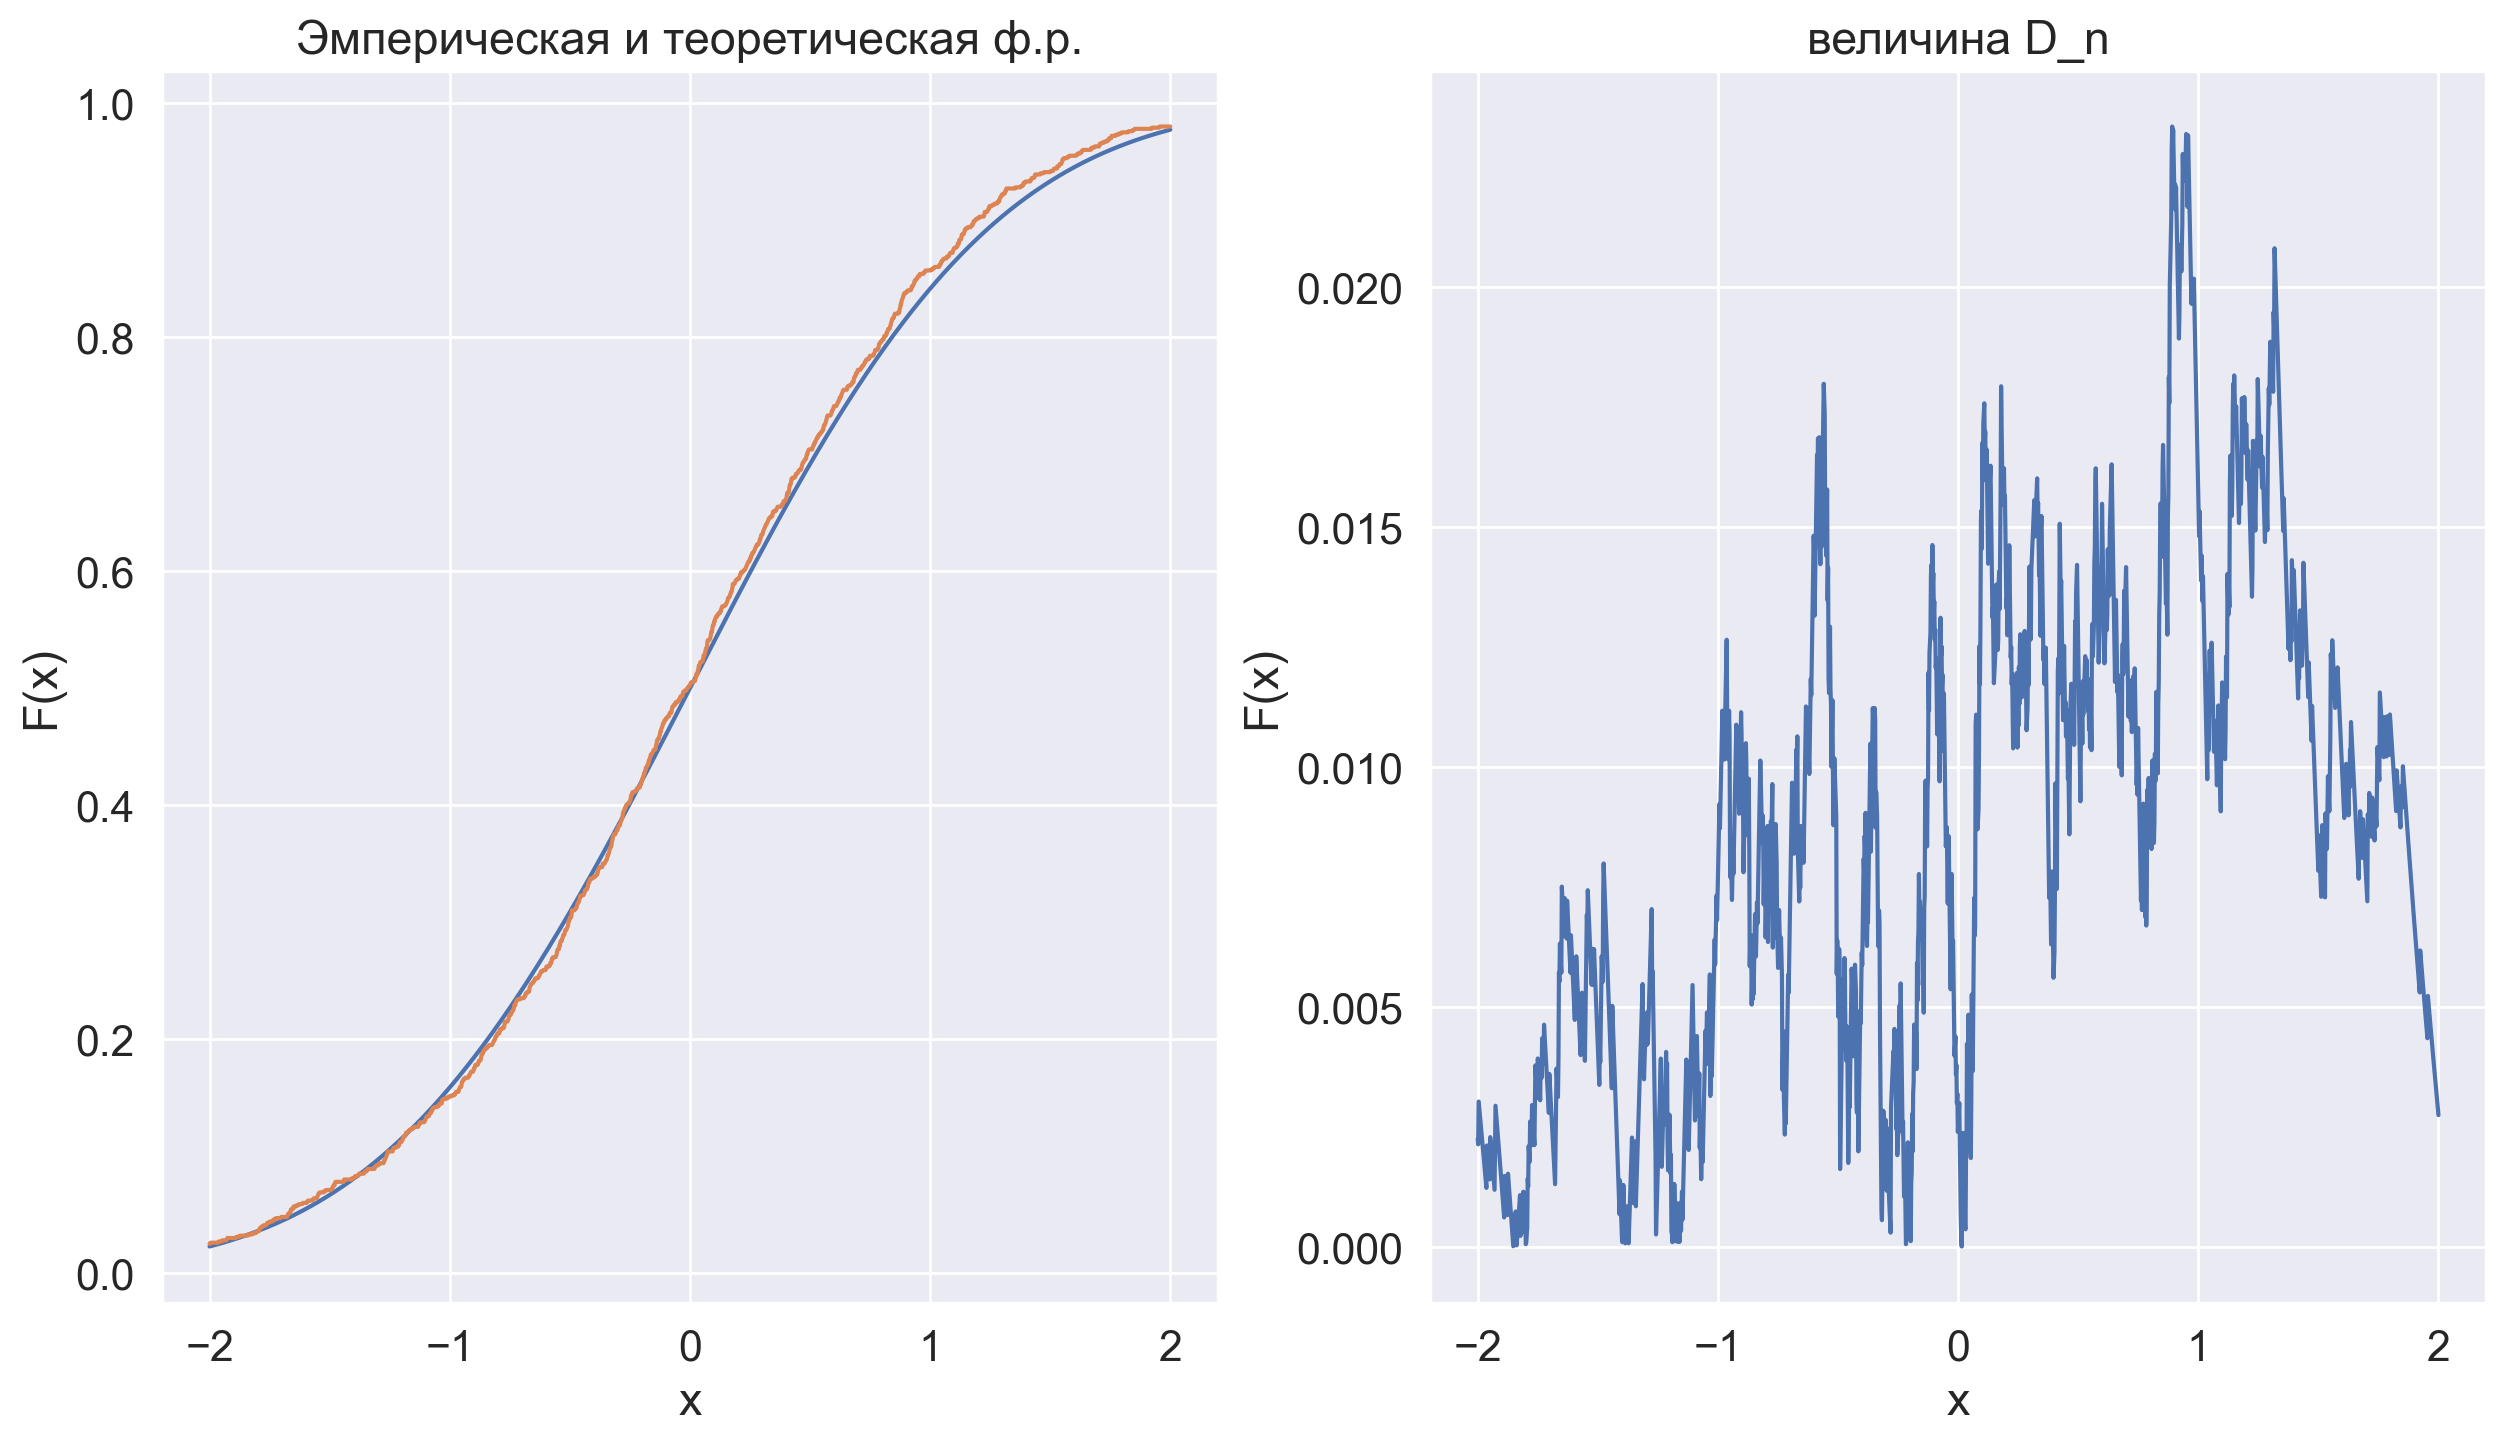

In [869]:
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(1, 2, figsize = [15, 8])
    axes[0].set_title("Эмперическая и теоретическая ф.р.")
    axes[0].plot(grid, norm_cdf(grid), label="теор. ф.р.")
    axes[0].plot(grid, F_emp(X, grid), label="эмп. ф.р.")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("F(x)")

    axes[1].set_title("величина D_n")
    axes[1].plot(grid, D_n_for_point(norm_cdf, X, grid))
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("F(x)")

Благодаря достаточно большой выборке, наша Эмперическая функция хорошо приближает теоретическую функцию распределения, это также можно увидеть на графике погрешностей справа, благодаря чему погрешность очень мала

In [870]:
D_n_array = D_n_for_point(norm_cdf, X, grid)
nD_n = np.sqrt(N) * D_n_array.max()

print(nD_n > kolm_quant)
print(np.round(nD_n,2) , np.round(kolm_quant, 2))

False
0.74 1.36


Наша выборка не попала в критическое множество, что значит что у нас нет основании отвергать гипотезу

2.3 Сгенерируйте 10000 нормальных выборок размера 100 и посмотрите, как часто критерий отвергает гипотезу.

In [871]:
def F_emp_multidim(X, t):
    X_samp = X.copy()
    X_samp = np.sort(X_samp, axis=1)
    index = np.array([np.searchsorted(row, t, side="right") for row in X_samp])
    return index / size

def D_n_for_point_multidim(F, X, t):
    return np.abs(F(t) - F_emp_multidim(X, t))

N = 10000
size = 1000
X_samples = sps.norm.rvs(loc=0, scale=1, size=(N, size))
alpha = 0.05
kolm_quant = sps.kstwobign.ppf(1 - alpha)
grid = np.linspace(-2, 2, 1000)

In [872]:
my_D_results = D_n_for_point_multidim(norm_cdf, X_samples, grid)
my_nDn = np.sqrt(size) * my_D_results.max(axis=1)
answers = my_nDn[my_nDn > kolm_quant]
print(answers.size)

429


отношение случаев отвержения гипотезы к общиму числу экспериментов близко к нашему $\alpha$

2.4 Постройте график мощности критерия на альтернативе в виде распределения Стьюдента в зависимости от параметра $k$. То есть для каждого $k$ посчитайте долю отвергаемых критерием стьюдентовских выборок

In [873]:
N=100000
n=75

In [874]:
alpha=0.05
norm_quant = sps.norm.ppf(1-alpha)
grid = np.arange(1, n+1)
my_array = np.array([sps.t.rvs(df=k, size=N) for k in grid])
percent_array = np.mean(my_array > norm_quant, axis=1)


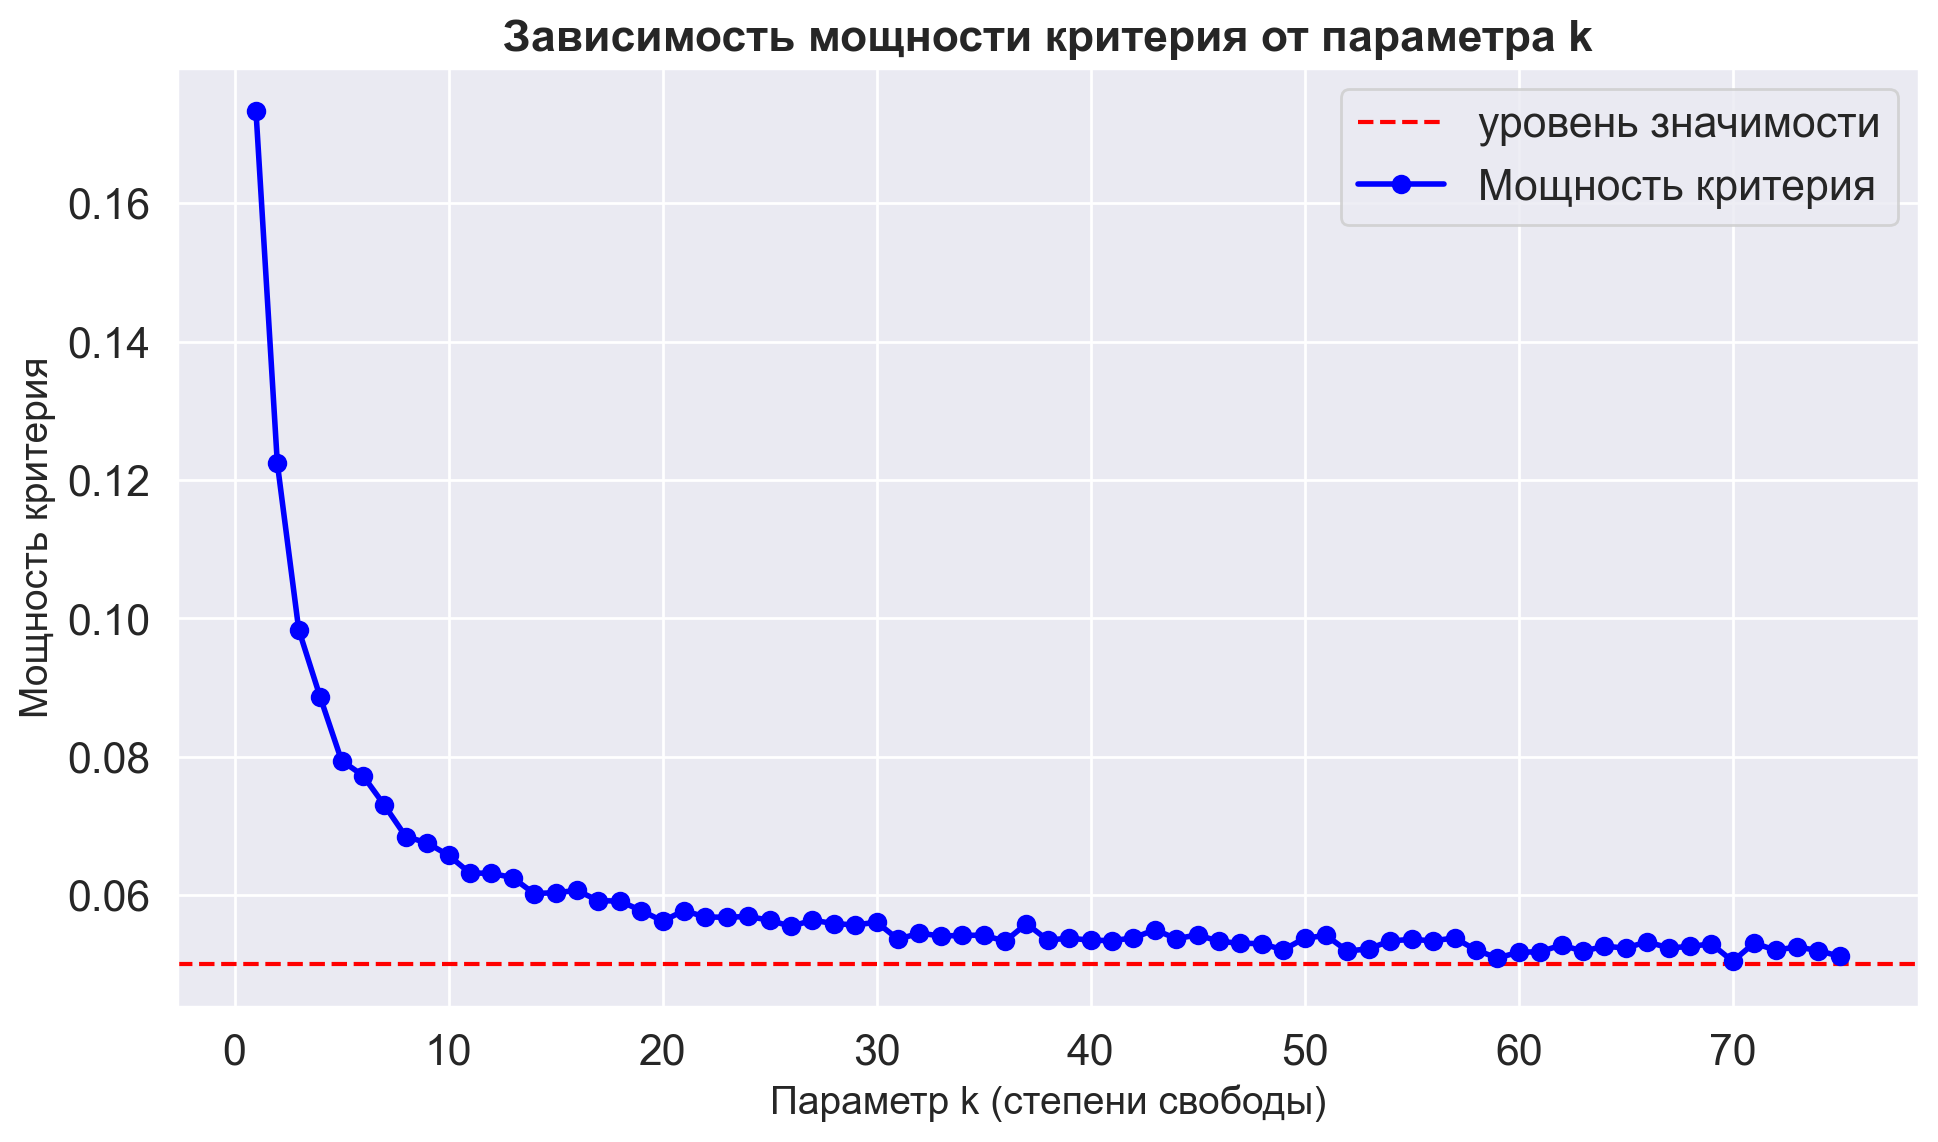

In [875]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10, 6))
    plt.axhline(y=0.05, color="red", linestyle="--",label="уровень значимости")
    plt.plot(grid, percent_array, color="blue", marker="o", linestyle="-", linewidth=2, markersize=6, label="Мощность критерия")
    plt.title("Зависимость мощности критерия от параметра k", fontsize=16, fontweight="bold")
    plt.xlabel("Параметр k (степени свободы)", fontsize=14)
    plt.ylabel("Мощность критерия", fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

Видно что мощность критерия стремится к уровню значимости который мы зафиксировали заранее, все потому что распределение Стьюдента стремится к ст. нормальному распределению

### Продвинутые критерии согласия

3. Проделайте действия из первой части задачи для [критерия Андерсона-Дарлинга](https://en.wikipedia.org/wiki/Anderson–Darling_test) и [Крамера-фон Мизеса-Смирнова](https://en.wikipedia.org/wiki/Cramér–von_Mises_criterion). Сравните их отвергающую способность с аналогичной у критерия Колмогорова.

In [876]:
#Ваш код здесь

### Критерий согласия Пирсона

4.1 Изучите критерий согласия Пирсона. В оригинальной постановке он работает для дискретных распределений. Предложите способ проверки при помощи него гипотез согласия для непрерывных распределений.

Ответ: можно разбить пространсво значении выборки на конечное разбиение, присваивая данным значение интервала в который они попали, тем самым приводя данные к дискретному распределению

4.2 Постройте критерий согласия Пирсона для нормальных распределений. Опишите, какие квантили для распределения хи-квадрат Вам потребуются.

Ответ:

разделим диапозон на m равных по мере промежутков, тогда

$\forall j \in \{1, ..., m\} \rightarrow p^{0}_j = \frac{1}{m} $

$\chi \hat = \sum^{m}_{i=1} \frac{\mu_j - \frac{1}{m}}{\frac{1}{m}} = m\sum^{m}_{i=1} (\mu_j - \frac{1}{m})$

где $Z_{1-\alpha}$ это $1-\alpha$ квантиль для $\chi^{2}_{m-1} $

4.3. Промоделируйте статистику хи-квадрат, считая доступным только нормальное распределение (другие семплировать нельзя!).

воспользуемся тем что $\chi^{2}_{m-1} $ представляется в виде $\sum^{m-1}_{i=1} N(0,1)^2$

In [945]:
N = 1000
m = 100
X = sps.norm.rvs(size = N)

Посчитаем 0.05 квантиль

In [3]:
def chi_square(size):
    samp = sps.norm.rvs(size=size)
    return np.sum(samp**2, axis=1)

In [4]:
sample = chi_square((m, N))
sorted_sample = np.sort(sample)
chi_quant = sorted_sample[int(0.05 * m)]
chi_quant

NameError: name 'm' is not defined

In [959]:
grid = np.linspace(0, 1, m)
my_range = sps.norm.ppf(grid)

mu_s = np.array([np.sum([(X >= my_range[k]) & (X < my_range[k + 1])]) for k in np.arange(0,m - 1)])


In [1]:
mu_s

NameError: name 'mu_s' is not defined

In [957]:
chi_hat = np.sum((mu_s - N/m)**2) / (N/m)
print(chi_hat > chi_quant)
print(chi_hat, chi_quant)

False
100.2 921.9890937098103


Выполните пункты, аналогичные 2.3 и 2.4. Постарайтесь так построить критерий согласия Пирсона, чтобы мощность для разных k была как можно больше.

In [878]:
#Ваш код здесь

### Стандартные способы проверки

5.1 Изучите критерий Шапиро-Уилка по [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro).

Что он проверяет? Будет ли он корректен для проверки распределения на равенство $\mathcal N(0, 1)$?

Ответ:

Проделайте пункты, аналогичные 2.3 и 2.4 для этого критерия.

In [879]:
#Ваш код здесь

Сделайте вывод о всех выполненных частях:



## Задача 2. Хи-хи-хи-хи-хи квадрат

*Данная задача стоит 10 баллов.*
**Это исследовательская задача!**

### Часть 1. Одномерный хи-квадрат

Британские учёные провели ряд экспериментов по выяснению склонности людей к неравнозначному выбору стратегии в камень-ножницы-бумага. По результатам 119 экспериментальных матчей было обнаружено, что 66 человек выбирали первым камень, 39 бумагу и 14 ножницы. Используя критерий хи-квадрат выясните, существует ли статистически достоверная выигрышная стратегия выбора первого хода.

Пользоваться критерием хи-квадрат из коробки запрещено. Распределение моделировать самому (или взять квантили из прошлой задачи).

Эта задача будет оцениваться не сколько за вычисления, сколько за правильный подход к формулировке условий, методов и вывода.

1. Сформулируйте статистическую гипотезу, которую будете проверять.

2. Выберите уровень значимости и объясните выбор.

3. Провалидируйте ваш критерий: с помощью многократного сэмплирования данных, подчиняющихся нулевой гипотезе (обычно берут порядка 100000 повторений, но можете взять чуть меньше, если мощности не позволяют), оцените распределение pvalue, постройте доверительный интервал для ошибки I рода вашего критерия и сделайте вывод о его пригодности.

Имеет ли смысл проверять распределение pvalue на равномерность с помощью, например, критерия Колмогорова? Если да, то проделайте это и сделайте выводы, если нет --- поясните, почему.

In [880]:
#Ваш код здесь

4. Примените критерий к нашим данным.

In [881]:
#Ваш код здесь

5. Дайте ответ на поставленный вопрос, чётко дав пояснение как надо играть и почему Вашему анализу можно верить. Используйте понятия "p-value", "гипотеза", "уровень значимости", "отвергать/принимать."

### Часть 2. Двумерный критерий хи-квадрат.

Критерий хи-квадрат на практике даёт простой и тем не менее самый популярный способ проверки категориальных данных на наличие зависимостей. Например, чтобы проверить, зависит ли время решения практики по статистике (в часах) от выпитого алкогольного напитка напрямую перед началом работы, поступают так: делают таблицу, где по одной размерности откладывают часы (от 1 до 5, скажем), а по другой --- напитки (пиво, вино, водка, вода,....) и в ячейку ставят число наблюдений (студентов), выпивших заданный напиток и сделавших прак за заданное число часов (ровно). И далее применяют хи-квадрат критерий (см. ниже).

Изучите пример применения обобщённого критерия хи-квадрат для проверки независимости категориальных выборок по [Википедии](https://en.wikipedia.org/wiki/Chi-squared_test#Example_chi-squared_test_for_categorical_data) или семинарскому ноутбуку.

Чтобы сразу дать практический пример, рассмотрим оценки двух случайных групп на первом курсе по последней контрольной по логике.

Перед и после контрольной студентам было предложено оценить своё мнение о контрольной по шкале от 1 до 10. В предложенных ниже списках Вы можете найти три числа: оценка студента, его голос за опрос до контрольной и после контрольной. До контрольной человек видел тренировочный вариант. Если человек не посетил кр/не голосовал, то в выборке стоит число -1. Это лишь индикатор отсутствия записи, а не значение.

Ответьте на следующие вопросы:
1. Статистически значима ли разница в результате групп? Справились ли они по-разному? (как правильно поставить гипотезу для двумерного хи-квадрат критерия подумайте сами).  *Подсказка*: будем считать, что группы справились неодинаково, если распределение людей, решивших 1, 2, 3, 4, 5 (категориальное) в разных группах *существенно отличается* (это мы и проверяем). Эквивалентно, распределение *зависит* от группы. А вот как проверить, что какая-то группа справилась лучше, решите сами.
2. "Контрольная убивает!". Проверьте, как изменилось мнение студентов о контрольной до и после неё. Значимы ли изменения?
3. "Гипотеза самоуверенности". Проверьте, есть ли зависимость между мнением человека о написанной им контрольной и результатом на контрольной?
4. "Чёт приуныл". Стало ли настроение студентов плохим/хуже, если они написали контрольную плохо?

Данные:

In [882]:
group1 = {"1": (0.4, -1, -1),
"2": (0.8, 9, 4),
"3": (-1, -1, -1),
"4": (1.6, 4, 5),
"5": (0.4, 5, 4),
"6": (1.8, -1, -1),
"7": (2.4, 3, 4),
"8": (3.0, 4, 7),
"9": (5.4, -1, -1),
"10": (2.2, 8, 3),
"11": (1.2, 8, 4),
"12": (0, -1, -1),
"13": (2.6, 9, 9),
"14": (0.4, 10, 4),
"15": (1.6, 10, 1),
"16": (1.2, 4, 5),
"17": (2.2, 8, 8)}

group2 = {"1": (0.8, 8, 7),
"2": (3.2, 4, 7),
"3": (2.6, 8, 5),
"4": (2.2, 10, 10),
"5": (0.4, 9, 9),
"6": (1.2, 4, 7),
"7": (1.2, 6, 7),
"8": (-1, -1, -1),
"9": (2.4, -1, -1),
"10": (1.8, 4, 9),
"11": (2.6, 8, 3),
"12": (1.8, 6, -1),
"13": (1.4, 6, 3),
"14": (-1, 3, -1),
"15": (1.2, 1, 1),
"16": (5, 4, 1)}


Сформулируйте гипотезу для критерия хи-квадрат и постройте табличную выборку.

Ответ:

In [883]:
#Ваш код здесь

Посчитайте необходимые статистики и сделайте вывод, какая группа справилась лучше с контрольной работой и значимы ли изменения. Напишите вывод с использованием терминов из темы "проверка гипотез".

## Задача 3. Корреляция

*Данная задача стоит 10 баллов.*

Подопытным первокурсникам было предложено решить контрольную работу по логике и отметить по шкале от 1 до 10 своё мнение о сложности работы. Проверьте, насколько скоррелированы показатели "оценка сложности работы" и "оценка за работу".

1. Для данных из прошлой задачи о контрольных изучите зависимость между мнением студента о контрольной до/после неё и оценкой.

Соберите их в любой удобный вид и визуализируйте.

In [884]:
#Ваш код здесь

Посчитайте коэффициенты корреляции Пирсона и Спирмена. Отличаются ли они? Почему?

In [885]:
#Ваш код здесь

Необходимо подтвердить наличие зависимости между парами выборок. Сформулируйте гипотезу о независимости на основании коэффициентов корреляции Пирсона и Спирмена и проверьте её на заранее выбранном Вами (обоснуйте выбор) уровне значимости.

In [886]:
#Ваш код здесь

Мы столкнулись с интересным эффектом --- гипотеза, которую мы проверяем может быть проверена двумя критериями. Давайте для простоты пока считать, что статистики критериев Пирсона и Спирмена независимы (хотя это не так, но часто бывают случаи, когда это так). Как принимать решение, если у критериев разное мнение о верности гипотезы? А если бы критериев было 3 и ответы были бы разными? Допустим, у каждого критерия ошибка первого рода ограничена уровнем значимости $\alpha$. Каким в таком случае значением ограничена вероятность ошибки первого рода хотя бы у одного из критериев?

Ответ:

На основании вопросов выше сделайте вывод о том, к как лучше всего стоит работать в случае, когда несколько критериев применяются одновременно:

На практике это называется **множественная проверка гипотез**. Можете поискать об этом информацию и написать поправку Бонферонни или любую другую. Эта часть не оценивается, но может быть интересна:

In [887]:
#Ваш код здесь

Сделайте вывод о том, есть ли всё-таки связь между мнением студента о сложности контрольной и его оценкой:

In [888]:
#Ваш код здесь

## Задача 4. T-критерий Стьюдента

*Первые три пункта стоят по 5 баллов, последний, бонусный, --- 10 баллов.*

Распространённой задачей статистики является обнаружение эффекта: есть две (или более, но мы рассмотрим случай с двумя) выборки, правда ли, что их средние отличаются? Классическим критерием для проверки такой гипотезы является *t-критерий*. Напомним, как он выводится.

Пусть $X_1, \ldots, X_n \sim \mathcal{N}(\mu_1, \sigma^2)$ и $Y_1, \ldots, Y_m \sim \mathcal{N}(\mu_2, \sigma^2)$ --- две независимые выборки (обратите внимание, мы предполагаем, что их дисперсии равны, хоть мы её и не знаем). На семинаре мы убедились, что при верности нулевой гипотезы $H_0\colon \mu_1 = \mu_2$ справедливо
$$
T(\mathbf X, \mathbf Y) = \sqrt{\frac{nm}{n+m}} \cdot \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{(n-1)s^2(\mathbf X) + (m-1)s^2(\mathbf Y)}{n+m-2}}} \sim T_{n+m-2},
$$
где $T_k$ --- распределение Стьюдента с $k$ степенями свободы, $s^2(\mathbf X)$ и $s^2(\mathbf Y)$ --- *несмещённые* выборочные дисперсии. Отсюда мы получаем критерий Стьюдента вида $R_{\alpha} = \{(\mathbf x, \mathbf y)\colon |T(\mathbf x, \mathbf y)| > t_{n+m-2, 1-\alpha/2}\}$ уровня значимости $\alpha$ (здесь $t_{k,p}$ --- $p$-квантиль распределения $T_k$).

1. В общем случае, когда про распределение выборок мы ничего не знаем, а гипотезу о равенстве средних проверить хочется, применяют асимптотический *критерий Вальда*, основанный на асимпт. нормальной оценке разности средних:
$$
W(\mathbf X, \mathbf Y) = \frac{\overline{X} - \overline{Y}}{\sqrt{s^2(\mathbf X)/n + s^2(\mathbf Y)/m}} \stackrel{d}{\to} \mathcal{N}(0, 1).
$$

Универсальность -- вещь хорошая, но тут распределение статистики известно лишь в пределе, что может вредить ошибке I рода. Убедимся в этом, провалидируя критерии.

Насэмплируйте достаточно много (в идеале 100000, но можно и чуть меньше, если мощности не позволяют) пар нормальных выборок размера 200 из нулевой гипотезы.

In [889]:
#Ваш код здесь

Посчитайте статистики критериев Вальда и Стьюдента для всех префиксов вместе с соответствующими pvalue. Для второго критерия можете воспользоваться методом [`scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [890]:
#Ваш код здесь

Для нескольких (3-4 штуки хватит) префиксов визуализируйте распределения pvalue. Что можно по ним сказать?

In [891]:
#Ваш код здесь

Оцените вероятность ошибки I рода критериев уровня значимости $\alpha = 0.05$ и нарисуйте график зависимости этой вероятности от размера выборки. На графике также нанесите доверительный интервал с помощью метода `plt.fill_between` (для удобства ДИ можно посчитать методом [`statsmodels.stats.proportion.proportion_confint`](https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportion_confint.html), который использовался в семинарском ноутбуке).

In [892]:
#Ваш код здесь

Сделайте выводы. Чем можно объяснить увиденное?

**Ответ:**

2. Поговорим про требования к модели, которые использует критерий Стьюдента. Помимо, конечно, независимости выборок, важную роль играют нормальность и равенство дисперсий. Эти два требования довольно ограничительные, можно ли от них хотя бы частично отказаться? Начнём с первого.

Теперь давайте сэмплировать выборки не из нормального распределения, а из каких-то других. В качестве таковых возьмём:
- $\mathrm{T}_5$ (распределение Стьюдента с параметром 5) и $\mathrm{Laplace}$,
- $\mathrm{Pois}(1)$ и $\mathrm{U}\{1, \ldots, 10\}$,
- $\mathrm{Beta}(3, 3)$ и $\mathrm{U}[0; 1]$,
- $\mathrm{Beta}(5, 1)$ и $\mathcal{N}(0, 1)$,
- Пятую пару распределений предлагается придумать самим (рекомендуем "на полях" проделать пункт для данных пар, найти закономерность и предложить в качестве пятой пары что-то репрезентативное).

Насэмплируйте много (порядка 100000) пар выборок $(\mathbf X, \mathbf Y)$, каждая размера 20, где $\mathbf X$ будет иметь первое распределение из пары, а $\mathbf Y$ --- второе. Не забудьте, что мы находимся в рамках нулевой гипотезы (хоть и нормальности у нас нет), поэтому обязательно отнормируйте выборки так, чтобы у них были одинаковые среднее и дисперсия.

In [893]:
#Ваш код здесь

Визуализируйте распределение pvalue и постройте ДИ для ошибки I рода для каждого из пяти случаев.

In [894]:
#Ваш код здесь

Что можно сказать про корректность критериев? В каких случаях критерий всё ещё контролирует ошибку I рода? Как думаете, с чем это связано? Если хотите, можете повторить процедуру для других пар распределений, чтобы эмпирически подтвердить вашу гипотезу. За бонусные баллы можете попробовать обосновать полученный результат теоретически.

**Ответ:**

3. Теперь перейдём к равенству дисперсий. Давайте проверим, контролирует ли t-критерий ошибку I рода, если ему на вход дать две нормальные выборки с равными средними, но не равными дисперсиями.

Насэмплируйте много (порядка 100000) нормальных выборок из $\mathcal{N}(0, 1)$ и посчитайте pvalue для разных размеров выборки (возьмите 3-4 значений в пределах от 10 до 100) и разных значений дисперсий (первые выборки оставьте без изменений, а вторые домножьте на взятые вами значения). Напоминаем, что использовать циклы for (кроме как для визуализации) -- моветон. Сделайте выводы.

In [895]:
#Ваш код здесь

Что же делать, если мы ничего не знаем про то, равны ли дисперсии у выборок или нет? В таком случае можно использовать так называемый [критерий Уэлча](https://en.wikipedia.org/wiki/Welch%27s_t-test). Он берёт под копотом похожу статистику, что и t-критерий, но для подсчёта pvalue использует функцию распределения Стьюдента с числом степеней свободы, *зависящим от выборок*. Оказывается, такой подгон даёт свои плоды (его мотивацию можно почитать по ссылке). Давайте проверим, что ошибка I рода у такого критерия уже будет контролироваться. Для этого проведите процедуру выше, но вместо t-критерия используйте критерий Уэлча (для этого достаточно в функцию `ttest_ind` прокинуть аргумент `equal_var=False`).

In [896]:
#Ваш код здесь

Почему же мы не забьём на t-критерий и не используем везде критерий Уэлча? Может быть он хуже отвергает неверную нулевую гипотезу? Для этого сравним эти критерии на предмет мощности, то есть способности отвергать нулевую гипотезу при верности альтернативы.

Чтобы сэмплировать выборки из альтернативы, достаточно сгенерировать много пар выборок из $\mathcal{N}(0, 1)$ и прибавить ко вторым выборкам смещение $\Delta \ne 0$ --- таким образом мы получим распределение из альтернативы.

Для разных значений $\Delta$ (значения берите по какой-нибудь достаточно мелкой сетке) и разных размеров выборки (попробуйте также брать выборки в парах разных размеров, достаточно рассмотреть 4 пары значений) оцените вероятность отвержения нулевой гипотезы на уровне значимости 0.05 и постройте график зависимости мощности от смещения $\Delta$. Сделайте выводы.

In [897]:
#Ваш код здесь

4. *Это бонусный пункт*.

Как мы поняли ранее, для распределений, отличных от нормального, распределение pvalue при равенстве средних может быть далёким от равномерного. Можно, конечно, сдвинуть пороговое значение при проверки критерия, чтобы подправить вероятность ошибки I рода, но будет ли такой критерий достаточно мощным? Не стоит ли рассмотреть какую-нибудь другой критерий? В этом пункте мы рассмотрим такой, он называется *критерием отношения правдоподобий* (или сокращённо КОП).

Рассмотрим выборку $X_1, \ldots, X_n$, которая пришла из распределения $\mathsf{P}_{\theta}$ с совместной плотностью $\rho_{\theta}(\mathbf x)$, параметризованного неким $\theta \in \Theta \subset{R^k}$. Поставим на проверку гипотезу $H_0\colon \theta \in \Theta_0$, где $\Theta_0 \subset \Theta$ --- поверхность размерности $l$ (простой пример такой гипотезы -- $H_0\colon \theta_1 = \ldots = \theta_{k-l} = 0$). КОП предлагает рассмотреть статистику
$$
LR(\mathbf X) = \frac{\sup_{\theta \in \Theta} \rho_{\theta}(\mathbf X)}{\sup_{\theta \in \Theta_0} \rho_{\theta}(\mathbf X)}.
$$

Своего рода она показывает, насколько общее правдоподобие выше частного, и если разрыв между ними очень большой, то критерий будет отвергать гипотезу $H_0$. Оказывается, что в некоторых условиях регулярности справедлив следующий асимптотический результат, называемый теоремой Уилкса:
$$
2 \ln LR(\mathbf X) \stackrel{d}{\to} \chi^2_{k-l}.
$$

Таким образом, критерий вида $\{\mathbf x\colon 2 \ln LR(\mathbf x) > \chi^2_{k-l,1-\alpha}\}$ будет иметь асимптотический уровень значимости $\alpha$. Применим его к проверке равенства средних, но для совсем другого семейства распределений, например, Коши.

Пусть $X_1, \ldots, X_n \sim \mathrm{Cauchy}(\mu_1, \sigma)$, $Y_1, \ldots, Y_m \sim \mathrm{Cauchy}(\mu_2, \sigma)$ --- две независимые выборки (для удобства возьмём $n=m=30$). Проверим гипотезу $H_0\colon \mu_1 = \mu_2$. Просэмплируйте много выборок при верности нулевой гипотезы, промоделируйте распределение статистики t-критерия и подберите такой порог $c$, чтобы критерий $\{(\mathbf x, \mathbf y)\colon T(\mathbf x, \mathbf y) > c\}$ имел уровень значимости примерно $\alpha$.

In [898]:
#Ваш код здесь

Сформулируйте поставновку задачи и гипотезу на языке КОП. Чему будет равно $k$ и $l$?

**Ответ:**

Научитесь численно решать задачу оптимизации, которая возникает при нахождении статистики $LR(\mathbf X)$, и реализуйте её. Для всех пар выборок посчитайте эту статистику и визуализируйте распределение pvalue. Похоже ли оно на равномерное? Контролируется ли ошибка I рода у критерия уровня значимости 0.05?

In [899]:
#Ваш код здесь

Сравним два полученных критерия по мощности. Для этого, аналогично пункту 3, оцените вероятность отвержения нулевой гипотезы для разных сдвигов $\Delta$. Учтите, что эта процедура может длиться ОЧЕНЬ долго. Заранее подумайте, как оптимизировать вычисления, не считать что-либо по нескольку раз и т.д.

In [900]:
#Ваш код здесь

Сделайте вывод.

**Вывод:**

In [901]:
#Ваш код здесь